# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [114]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [115]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv("SAMPLE.env")

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [116]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [117]:
# The monthly amount for the member's household income

monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [118]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [119]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(btc_response, indent = 4, sort_keys = True))


{
    "data": {
        "1": {
            "circulating_supply": 19165312,
            "id": 1,
            "last_updated": 1664587726,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 371806764701,
                    "percent_change_1h": -0.361570646990498,
                    "percent_change_24h": -0.505242111792254,
                    "percent_change_7d": 0.518286512611527,
                    "percentage_change_1h": -0.361570646990498,
                    "percentage_change_24h": -0.505242111792254,
                    "percentage_change_7d": 0.518286512611527,
                    "price": 19391.89,
                    "volume_24h": 35917729034
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19165312,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

In [120]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(eth_response, indent = 4, sort_keys = True))

{
    "data": {
        "1027": {
            "circulating_supply": 120750177,
            "id": 1027,
            "last_updated": 1664587750,
            "max_supply": 120753943,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 160580647059,
                    "percent_change_1h": -0.274710299848652,
                    "percent_change_24h": -0.0851419044342636,
                    "percent_change_7d": 0.0146641113826614,
                    "percentage_change_1h": -0.274710299848652,
                    "percentage_change_24h": -0.0851419044342636,
                    "percentage_change_7d": 0.0146641113826614,
                    "price": 1329.75,
                    "volume_24h": 11187617813
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120750177,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
       

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [121]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response ["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC

btc_price


19391.89

In [122]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response ["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price


1329.75

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [123]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC

btc_value


23270.268

In [124]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH

eth_value


7047.675

In [125]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance

total_crypto_wallet

30317.943

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [126]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [127]:
# Set the variables for the Alpaca API and secret keys

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [128]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day

timeframe = "1Day"


# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start_date = pd.Timestamp("2022-09-28", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-28", tz="America/New_York").isoformat()

#Prints out the start and end date to make sure it is reading the correct date

start_date
end_date

'2022-09-28T00:00:00-04:00'

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [129]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame

prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame

# Separate ticker data

SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames

prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG",])

# Review the first 5 rows of the Alpaca DataFrame

prices_df.head()

SPY                                   \
                             open   high    low   close     volume   
timestamp                                                            
2022-09-28 04:00:00+00:00  364.44  372.3  362.6  370.53  109578062   

                                                     AGG                  \
                          trade_count        vwap   open     high    low   
timestamp                                                                  
2022-09-28 04:00:00+00:00      704940  367.937105  96.47  97.1277  96.27   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2022-09-28 04:00:00+00:00  97.08  10530370       38055  96.834989

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [130]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df["AGG", "close"]

# Print the AGG closing price

print("Closing Price of AGG")

print("--------------------")

agg_close_price


Closing Price of AGG
--------------------


timestamp
2022-09-28 04:00:00+00:00    97.08
Name: (AGG, close), dtype: float64

In [131]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df["SPY", "close"]

# Print the SPY closing price
print("Closing Price of SPY")

print("--------------------")

spy_close_price


Closing Price of SPY
--------------------


timestamp
2022-09-28 04:00:00+00:00    370.53
Name: (SPY, close), dtype: float64

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [132]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio

print("Current Value of AGG Portfolio")

print("--------------------")

agg_value


Current Value of AGG Portfolio
--------------------


timestamp
2022-09-28 04:00:00+00:00    19416.0
Name: (AGG, close), dtype: float64

In [133]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio

print("Current Value of SPY Portfolio")

print("--------------------")

spy_value




Current Value of SPY Portfolio
--------------------


timestamp
2022-09-28 04:00:00+00:00    40758.3
Name: (SPY, close), dtype: float64

In [134]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value + agg_value

# Print the current balance of the stock and bond portion of the portfolio

print("Total Value of Stock Portfolio")

print("--------------------")


total_stocks_bonds



Total Value of Stock Portfolio
--------------------


timestamp
2022-09-28 04:00:00+00:00    60174.3
dtype: float64

In [135]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance

print("Total Value of Portfolio")

print("--------------------")

total_portfolio


Total Value of Portfolio
--------------------


timestamp
2022-09-28 04:00:00+00:00    90492.243
dtype: float64

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [136]:
# Consolidate financial assets data into a Python list

savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data

savings_data

    

[30317.943,
 timestamp
 2022-09-28 04:00:00+00:00    60174.3
 dtype: float64]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [137]:
# Create a Pandas DataFrame called savings_df 

savings_df = pd.DataFrame(
    savings_data,
    columns= ["amount"],
    index = ["crypto", "stock/bond"]
)

# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,30317.943
stock/bond,timestamp 2022-09-28 04:00:00+00:00 60174.3...


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

In [138]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart



savings_df.plot.pie(y = "amount", title = "Member Portfolio of Crypto and Stock/Bond", figsize = (10,7))



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [139]:
# Create a variable named emergency_fund_value

emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [140]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if (total_portfolio > emergency_fund_value):
    print("Congrats member you have enough funds in your emergency portfolio")
    
elif (total_portfolio == emergency_fund_value):
    print("Congrats member on reaching this important financial goal")
        
else: 
    print("Sadly you do not have enough funds in your portfolio")



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [161]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 


start_date = "2018-09-28"
end_date = "2022-09-28"

In [164]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

three_year_DataFrame = alpaca.get_bars(tickers, timeframe, start_date, end_date).df


# Reorganize the DataFrame
# Separate ticker data

AGG_three_year_DataFrame = three_year_DataFrame[three_year_DataFrame["symbol"] == "AGG"].drop("symbol", axis = 1)
SPY_three_year_DataFrame = three_year_DataFrame[three_year_DataFrame["symbol"] == "SPY"].drop("symbol", axis = 1)


# Concatenate the ticker DataFrames

three_year_DataFrame = pd.concat([AGG_three_year_DataFrame,SPY_three_year_DataFrame], axis = 1, keys = ['AGG', 'SPY'])

# Display both the first and last five rows of the DataFrame

print("First 5 Rows in DataFrame")

display(three_year_DataFrame.head())

print("Last 5 Rows in DataFrame")

display(three_year_DataFrame.tail())


First 5 Rows in DataFrame


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2018-09-28 04:00:00+00:00  105.69  105.7100  105.5100  105.52  4883958   
2018-10-01 04:00:00+00:00  105.28  105.3500  105.2000  105.24  3518389   
2018-10-02 04:00:00+00:00  105.32  105.4600  105.2500  105.36  6912595   
2018-10-03 04:00:00+00:00  105.22  105.2400  104.7500  104.86  2540484   
2018-10-04 04:00:00+00:00  104.65  104.7171  104.4701  104.56  5268197   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-09-28 04:00:00+00:00       15703  105.582785  290.01  291.280  289.95   
2018-10-01 04:00:00+00:00       10736  105.264691  292.12  292.930  290.98   
2018-10-02 04:00:00+00:00       17110  105.384980  291.57  292.355  291.14   
2018-10-03 04:00:00+00:00       12195  104.988470  292.74  293.210  291.32   
2018-10-04 04:00:00+00:00       14128  104.562689  291.22  291.240  287.66   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-09-28 04:00:00+00:00  290.72   70091460      267815  290.599861  
2018-10-01 04:00:00+00:00  291.73   62578937      254454  291.962582  
2018-10-02 04:00:00+00:00  291.56   47288227      220334  291.709802  
2018-10-03 04:00:00+00:00  291.72   64695630      258733  292.253915  
2018-10-04 04:00:00+00:00  289.44  112856465      478297  289.463236

Last 5 Rows in DataFrame


AGG                                     \
                            open     high      low  close    volume   
timestamp                                                             
2022-09-22 04:00:00+00:00  97.90  97.9200  97.4039  97.50   7092118   
2022-09-23 04:00:00+00:00  97.40  97.4500  96.8900  97.20  11053650   
2022-09-26 04:00:00+00:00  96.87  96.9100  95.8650  95.95   8467717   
2022-09-27 04:00:00+00:00  95.96  96.0750  95.3750  95.54  11400353   
2022-09-28 04:00:00+00:00  96.47  97.1277  96.2700  97.08  10530370   

                                                     SPY                    \
                          trade_count       vwap    open    high       low   
timestamp                                                                    
2022-09-22 04:00:00+00:00       25072  97.595666  376.50  378.30  373.4400   
2022-09-23 04:00:00+00:00       41351  97.135798  370.58  370.62  363.2900   
2022-09-26 04:00:00+00:00       32092  96.272680  366.41  370.21  363.0299   
2022-09-27 04:00:00+00:00       35134  95.649073  368.01  370.40  360.8700   
2022-09-28 04:00:00+00:00       38055  96.834989  364.44  372.30  362.6000   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-09-22 04:00:00+00:00  374.22   88922900      630401  375.330794  
2022-09-23 04:00:00+00:00  367.95  121574096      838774  367.579806  
2022-09-26 04:00:00+00:00  364.31   91731346      633024  365.928441  
2022-09-27 04:00:00+00:00  363.38  105884493      771522  364.580711  
2022-09-28 04:00:00+00:00  370.53  109578062      704940  367.937105

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [165]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.



MC_60_40 = MCSimulation(portfolio_data = three_year_DataFrame, weights = [.40, .60], num_simulation = 500, num_trading_days = (252 * 30))


# Review the simulation input data

MC_60_40.portfolio_data


AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2018-09-28 04:00:00+00:00  105.69  105.7100  105.5100  105.52   4883958   
2018-10-01 04:00:00+00:00  105.28  105.3500  105.2000  105.24   3518389   
2018-10-02 04:00:00+00:00  105.32  105.4600  105.2500  105.36   6912595   
2018-10-03 04:00:00+00:00  105.22  105.2400  104.7500  104.86   2540484   
2018-10-04 04:00:00+00:00  104.65  104.7171  104.4701  104.56   5268197   
...                           ...       ...       ...     ...       ...   
2022-09-22 04:00:00+00:00   97.90   97.9200   97.4039   97.50   7092118   
2022-09-23 04:00:00+00:00   97.40   97.4500   96.8900   97.20  11053650   
2022-09-26 04:00:00+00:00   96.87   96.9100   95.8650   95.95   8467717   
2022-09-27 04:00:00+00:00   95.96   96.0750   95.3750   95.54  11400353   
2022-09-28 04:00:00+00:00   96.47   97.1277   96.2700   97.08  10530370   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-09-28 04:00:00+00:00       15703  105.582785          NaN  290.01   
2018-10-01 04:00:00+00:00       10736  105.264691    -0.002654  292.12   
2018-10-02 04:00:00+00:00       17110  105.384980     0.001140  291.57   
2018-10-03 04:00:00+00:00       12195  104.988470    -0.004746  292.74   
2018-10-04 04:00:00+00:00       14128  104.562689    -0.002861  291.22   
...                               ...         ...          ...     ...   
2022-09-22 04:00:00+00:00       25072   97.595666    -0.010654  376.50   
2022-09-23 04:00:00+00:00       41351   97.135798    -0.003077  370.58   
2022-09-26 04:00:00+00:00       32092   96.272680    -0.012860  366.41   
2022-09-27 04:00:00+00:00       35134   95.649073    -0.004273  368.01   
2022-09-28 04:00:00+00:00       38055   96.834989     0.016119  364.44   

                                                                             \
                              high       low   close     volume trade_count   
timestamp                                                                     
2018-09-28 04:00:00+00:00  291.280  289.9500  290.72   70091460      267815   
2018-10-01 04:00:00+00:00  292.930  290.9800  291.73   62578937      254454   
2018-10-02 04:00:00+00:00  292.355  291.1400  291.56   47288227      220334   
2018-10-03 04:00:00+00:00  293.210  291.3200  291.72   64695630      258733   
2018-10-04 04:00:00+00:00  291.240  287.6600  289.44  112856465      478297   
...                            ...       ...     ...        ...         ...   
2022-09-22 04:00:00+00:00  378.300  373.4400  374.22   88922900      630401   
2022-09-23 04:00:00+00:00  370.620  363.2900  367.95  121574096      838774   
2022-09-26 04:00:00+00:00  370.210  363.0299  364.31   91731346      633024   
2022-09-27 04:00:00+00:00  370.400  360.8700  363.38  105884493      771522   
2022-09-28 04:00:00+00:00  372.300  362.6000  370.53  109578062      704940   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-09-28 04:00:00+00:00  290.599861          NaN  
2018-10-01 04:00:00+00:00  291.962582     0.003474  
2018-10-02 04:00:00+00:00  291.709802    -0.000583  
2018-10-03 04:00:00+00:00  292.253915     0.000549  
2018-10-04 04:00:00+00:00  289.463236    -0.007816  
...                               ...          ...  
2022-09-22 04:00:00+00:00  375.330794    -0.008557  
2022-09-23 04:00:00+00:00  367.579806    -0.016755  
2022-09-26 04:00:00+00:00  365.928441    -0.009893  
2022-09-27 04:00:00+00:00  364.580711    -0.002553  
2022-09-28 04:00:00+00:00  367.937105     0.019676  

[1007 rows x 16 columns]

In [166]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_60_40.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brian/Desktop/Fintech-Workspace/Fintech Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989339,0.993531,0.997722,1.009276,0.992341,1.010333,1.011597,1.015936,0.997265,1.004837,...,0.996793,1.009850,0.997163,0.982741,1.008344,1.012966,1.005018,0.989829,1.003639,1.000300
2,0.994956,0.988496,0.993876,1.014365,0.991656,1.018177,1.001661,1.017537,0.993909,1.005599,...,1.008423,1.015525,0.989783,0.986616,1.024949,1.008523,1.004173,0.986531,1.005602,1.001892
3,0.988971,0.990019,0.998115,1.011551,1.001528,1.016622,1.001855,1.018830,0.984359,1.001409,...,1.017069,1.012353,0.985728,0.978053,1.017993,1.012842,1.001948,0.992703,1.013480,1.009917
4,0.992067,0.996038,0.998183,1.013219,0.987905,1.018181,1.011138,1.008160,0.979468,1.003671,...,1.028787,1.005435,0.979694,0.962665,1.036517,1.015435,0.994138,0.997572,0.995805,1.004769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.792110,1.076614,10.492569,3.324254,5.262604,5.065287,4.324843,6.031181,1.137301,1.212453,...,3.331524,5.861320,2.034444,2.843307,2.235267,3.846690,4.769735,12.683743,2.184234,1.013782
7557,6.778270,1.078592,10.346191,3.331181,5.213225,5.090175,4.382007,6.009258,1.146156,1.208662,...,3.320014,5.841215,2.024843,2.818351,2.241825,3.810142,4.760920,12.813271,2.187575,1.013851
7558,6.733573,1.091212,10.467752,3.316453,5.222270,5.175646,4.491858,5.979941,1.147695,1.186040,...,3.365106,5.803370,2.004001,2.801810,2.256738,3.826764,4.751292,12.695448,2.183171,1.011303
7559,6.722708,1.089916,10.513559,3.297663,5.158737,5.204489,4.541267,5.998649,1.154361,1.176776,...,3.356527,5.784404,1.983952,2.816883,2.270372,3.807974,4.773074,12.756624,2.201148,1.016298


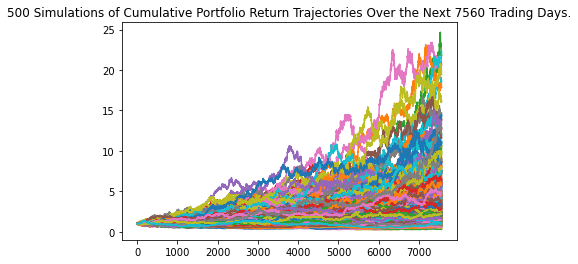

In [167]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plota

MC_60_40_Line_Plot = MC_60_40.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

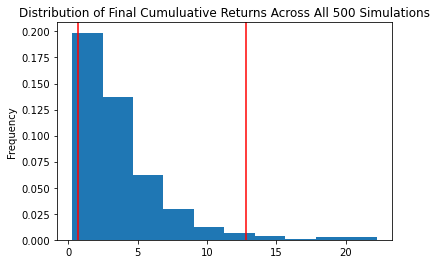

In [168]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 

MC_60_40_Line_Plot = MC_60_40.plot_distribution()





#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [169]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_60_40 = MC_60_40.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics

MC_60_40

count           500.000000
mean              3.818512
std               3.262626
min               0.289120
25%               1.687792
50%               2.864786
75%               4.706710
max              22.225015
95% CI Lower      0.695818
95% CI Upper     12.845520
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [170]:
# Print the current balance of the stock and bond portion of the members portfolio

total_stocks_bonds


timestamp
2022-09-28 04:00:00+00:00    60174.3
dtype: float64

In [173]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = (MC_60_40[8] * total_stocks_bonds, 2)
ci_upper_thirty_cumulative_return = (MC_60_40[9] * total_stocks_bonds , 2)

# Print the result of your calculations
display(ci_lower_thirty_cumulative_return)
display(ci_upper_thirty_cumulative_return)

(timestamp
 2022-09-28 04:00:00+00:00    41870.339668
 dtype: float64,
 2)

(timestamp
 2022-09-28 04:00:00+00:00    772970.147893
 dtype: float64,
 2)

### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [174]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

MC_60_40_10yr = MCSimulation(portfolio_data = three_year_DataFrame, weights = [.80,.20], num_simulation = 500, num_trading_days = 252 *10) 


# Review the simulation input data

MC_60_40_10yr.portfolio_data

AGG                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2018-09-28 04:00:00+00:00  105.69  105.7100  105.5100  105.52   4883958   
2018-10-01 04:00:00+00:00  105.28  105.3500  105.2000  105.24   3518389   
2018-10-02 04:00:00+00:00  105.32  105.4600  105.2500  105.36   6912595   
2018-10-03 04:00:00+00:00  105.22  105.2400  104.7500  104.86   2540484   
2018-10-04 04:00:00+00:00  104.65  104.7171  104.4701  104.56   5268197   
...                           ...       ...       ...     ...       ...   
2022-09-22 04:00:00+00:00   97.90   97.9200   97.4039   97.50   7092118   
2022-09-23 04:00:00+00:00   97.40   97.4500   96.8900   97.20  11053650   
2022-09-26 04:00:00+00:00   96.87   96.9100   95.8650   95.95   8467717   
2022-09-27 04:00:00+00:00   95.96   96.0750   95.3750   95.54  11400353   
2022-09-28 04:00:00+00:00   96.47   97.1277   96.2700   97.08  10530370   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-09-28 04:00:00+00:00       15703  105.582785          NaN  290.01   
2018-10-01 04:00:00+00:00       10736  105.264691    -0.002654  292.12   
2018-10-02 04:00:00+00:00       17110  105.384980     0.001140  291.57   
2018-10-03 04:00:00+00:00       12195  104.988470    -0.004746  292.74   
2018-10-04 04:00:00+00:00       14128  104.562689    -0.002861  291.22   
...                               ...         ...          ...     ...   
2022-09-22 04:00:00+00:00       25072   97.595666    -0.010654  376.50   
2022-09-23 04:00:00+00:00       41351   97.135798    -0.003077  370.58   
2022-09-26 04:00:00+00:00       32092   96.272680    -0.012860  366.41   
2022-09-27 04:00:00+00:00       35134   95.649073    -0.004273  368.01   
2022-09-28 04:00:00+00:00       38055   96.834989     0.016119  364.44   

                                                                             \
                              high       low   close     volume trade_count   
timestamp                                                                     
2018-09-28 04:00:00+00:00  291.280  289.9500  290.72   70091460      267815   
2018-10-01 04:00:00+00:00  292.930  290.9800  291.73   62578937      254454   
2018-10-02 04:00:00+00:00  292.355  291.1400  291.56   47288227      220334   
2018-10-03 04:00:00+00:00  293.210  291.3200  291.72   64695630      258733   
2018-10-04 04:00:00+00:00  291.240  287.6600  289.44  112856465      478297   
...                            ...       ...     ...        ...         ...   
2022-09-22 04:00:00+00:00  378.300  373.4400  374.22   88922900      630401   
2022-09-23 04:00:00+00:00  370.620  363.2900  367.95  121574096      838774   
2022-09-26 04:00:00+00:00  370.210  363.0299  364.31   91731346      633024   
2022-09-27 04:00:00+00:00  370.400  360.8700  363.38  105884493      771522   
2022-09-28 04:00:00+00:00  372.300  362.6000  370.53  109578062      704940   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-09-28 04:00:00+00:00  290.599861          NaN  
2018-10-01 04:00:00+00:00  291.962582     0.003474  
2018-10-02 04:00:00+00:00  291.709802    -0.000583  
2018-10-03 04:00:00+00:00  292.253915     0.000549  
2018-10-04 04:00:00+00:00  289.463236    -0.007816  
...                               ...          ...  
2022-09-22 04:00:00+00:00  375.330794    -0.008557  
2022-09-23 04:00:00+00:00  367.579806    -0.016755  
2022-09-26 04:00:00+00:00  365.928441    -0.009893  
2022-09-27 04:00:00+00:00  364.580711    -0.002553  
2022-09-28 04:00:00+00:00  367.937105     0.019676  

[1007 rows x 16 columns]

In [175]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns

MC_60_40_10yr.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/brian/Desktop/Fintech-Workspace/Fintech Challenges/Challenge 5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999623,1.005860,1.004848,1.000198,0.999674,0.998820,1.000325,0.998309,1.003258,0.995608,...,0.998140,1.004310,0.998313,1.011136,0.998181,0.999650,0.992243,0.999782,0.999414,0.997718
2,1.000504,1.005547,1.013248,0.997583,0.994044,0.999104,0.998027,1.002259,1.007646,0.991855,...,0.999722,1.001834,0.995104,1.010577,0.994217,0.996787,0.987808,0.998743,0.987114,1.000444
3,1.000304,1.000653,1.010685,0.988152,0.993880,0.998533,0.998106,0.996763,1.004225,0.995499,...,0.993231,1.002987,0.988951,1.016573,0.990274,1.004768,0.986285,1.003946,0.984680,1.001390
4,0.998496,1.001805,1.002101,0.987815,0.993557,0.996953,0.989666,0.991097,1.005503,0.993048,...,0.995075,1.004350,0.987148,1.017829,0.988647,1.001846,0.984457,0.996772,0.982832,0.999673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.252346,1.005000,1.555745,1.443397,0.859498,1.133024,0.987986,0.895716,1.097867,1.058126,...,1.284176,1.174251,1.198976,1.153119,0.901291,0.763475,0.979120,1.165343,0.913671,0.963978
2517,1.255628,1.007600,1.546154,1.448277,0.861851,1.129722,0.994438,0.899167,1.088374,1.058984,...,1.287303,1.173756,1.204151,1.157139,0.906228,0.763927,0.976738,1.162966,0.913911,0.962527
2518,1.265182,1.005981,1.551041,1.449432,0.858495,1.130483,0.995458,0.899792,1.093292,1.062167,...,1.288794,1.174501,1.209875,1.164503,0.906086,0.764629,0.978834,1.161154,0.915048,0.964799
2519,1.267390,1.007809,1.552313,1.443223,0.861389,1.139945,1.001627,0.901947,1.089911,1.070524,...,1.280752,1.176899,1.214488,1.159610,0.906504,0.768253,0.977926,1.162345,0.911501,0.967742


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

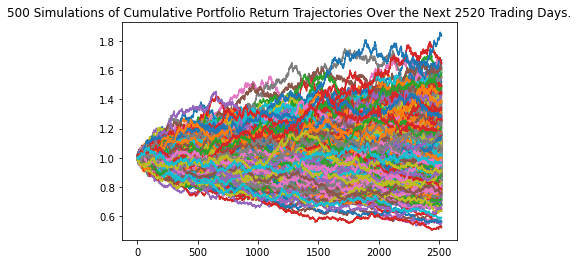

In [176]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

MC_60_40_10yr.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

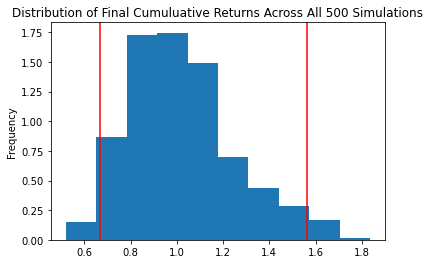

In [178]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

MC_60_40_10yr.plot_distribution()


In [179]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

Statistic_MC_60_40_10yr = MC_60_40_10yr.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
display(Statistic_MC_60_40_10yr)

count           500.000000
mean              1.024593
std               0.228540
min               0.519742
25%               0.867412
50%               0.997770
75%               1.151949
max               1.836388
95% CI Lower      0.667406
95% CI Upper      1.561642
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [180]:
# Print the current balance of the stock and bond portion of the members portfolio

total_stocks_bonds

timestamp
2022-09-28 04:00:00+00:00    60174.3
dtype: float64

In [185]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = (Statistic_MC_60_40_10yr[8] * total_stocks_bonds, 2)
ci_upper_ten_cumulative_return = (Statistic_MC_60_40_10yr[9] * total_stocks_bonds, 2)

# Print the result of your calculations

display(ci_lower_ten_cumulative_return)
display(ci_upper_ten_cumulative_return)


(timestamp
 2022-09-28 04:00:00+00:00    40160.716353
 dtype: float64,
 2)

(timestamp
 2022-09-28 04:00:00+00:00    93970.700622
 dtype: float64,
 2)

#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?